# Galois Field Arithmetic

## Introduction

A **Galois field** (also known as a **finite field**), denoted $\text{GF}(p^n)$ or $\mathbb{F}_{p^n}$, is a field containing a finite number of elements. These algebraic structures are fundamental to modern cryptography, coding theory, and computer science.

Named after Évariste Galois (1811–1832), finite fields have profound applications in:
- **Error-correcting codes** (Reed-Solomon, BCH codes)
- **Cryptographic algorithms** (AES, elliptic curve cryptography)
- **Digital signal processing**
- **Combinatorics and algebraic geometry**

## Mathematical Foundation

### Definition of a Field

A **field** $(F, +, \cdot)$ is a set $F$ equipped with two binary operations (addition and multiplication) satisfying:

1. **Closure**: $\forall a, b \in F: a + b \in F$ and $a \cdot b \in F$
2. **Associativity**: $(a + b) + c = a + (b + c)$ and $(a \cdot b) \cdot c = a \cdot (b \cdot c)$
3. **Commutativity**: $a + b = b + a$ and $a \cdot b = b \cdot a$
4. **Identity elements**: $\exists\, 0, 1 \in F$ such that $a + 0 = a$ and $a \cdot 1 = a$
5. **Additive inverse**: $\forall a \in F, \exists\, (-a) \in F: a + (-a) = 0$
6. **Multiplicative inverse**: $\forall a \in F \setminus \{0\}, \exists\, a^{-1} \in F: a \cdot a^{-1} = 1$
7. **Distributivity**: $a \cdot (b + c) = a \cdot b + a \cdot c$

### Prime Fields: $\text{GF}(p)$

For any prime $p$, the integers modulo $p$ form a field:

$$\text{GF}(p) = \mathbb{Z}/p\mathbb{Z} = \{0, 1, 2, \ldots, p-1\}$$

Arithmetic operations are performed modulo $p$:
- **Addition**: $a \oplus b = (a + b) \mod p$
- **Multiplication**: $a \otimes b = (a \cdot b) \mod p$
- **Multiplicative inverse**: Found using the Extended Euclidean Algorithm

### Extension Fields: $\text{GF}(p^n)$

For prime power orders $p^n$ where $n > 1$, we construct extension fields using **irreducible polynomials**.

Elements of $\text{GF}(p^n)$ are polynomials of degree $< n$ with coefficients in $\text{GF}(p)$:

$$\text{GF}(p^n) = \{a_0 + a_1 x + a_2 x^2 + \cdots + a_{n-1} x^{n-1} : a_i \in \text{GF}(p)\}$$

Arithmetic is performed modulo an **irreducible polynomial** $f(x)$ of degree $n$ over $\text{GF}(p)$:

$$a(x) \otimes b(x) = (a(x) \cdot b(x)) \mod f(x)$$

### The Extended Euclidean Algorithm

To find multiplicative inverses, we use the Extended Euclidean Algorithm. For $a \in \text{GF}(p)^*$:

$$a \cdot a^{-1} \equiv 1 \pmod{p}$$

The algorithm finds $a^{-1}$ by solving Bézout's identity:

$$\gcd(a, p) = a \cdot x + p \cdot y = 1$$

where $x = a^{-1} \mod p$.

### Primitive Elements and Generators

A **primitive element** (or generator) $\alpha$ of $\text{GF}(p^n)^*$ is an element whose powers generate all non-zero elements:

$$\text{GF}(p^n)^* = \{\alpha^0, \alpha^1, \alpha^2, \ldots, \alpha^{p^n - 2}\}$$

The multiplicative group $\text{GF}(p^n)^*$ is cyclic of order $p^n - 1$.

## Implementation

We will implement Galois field arithmetic for both prime fields $\text{GF}(p)$ and extension fields $\text{GF}(p^n)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Optional

# Set up matplotlib for publication-quality figures
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 11,
    'figure.figsize': (12, 10),
    'figure.dpi': 100
})

### Prime Field Arithmetic: $\text{GF}(p)$

In [2]:
class GFp:
    """
    Galois Field GF(p) - Prime Field Implementation
    
    Implements arithmetic operations over integers modulo a prime p.
    """
    
    def __init__(self, p: int):
        """
        Initialize GF(p) with prime p.
        
        Parameters:
            p: Prime number defining the field order
        """
        if not self._is_prime(p):
            raise ValueError(f"{p} is not prime")
        self.p = p
        self.elements = list(range(p))
    
    @staticmethod
    def _is_prime(n: int) -> bool:
        """Check if n is prime using trial division."""
        if n < 2:
            return False
        if n == 2:
            return True
        if n % 2 == 0:
            return False
        for i in range(3, int(n**0.5) + 1, 2):
            if n % i == 0:
                return False
        return True
    
    def add(self, a: int, b: int) -> int:
        """Addition in GF(p): (a + b) mod p"""
        return (a + b) % self.p
    
    def subtract(self, a: int, b: int) -> int:
        """Subtraction in GF(p): (a - b) mod p"""
        return (a - b) % self.p
    
    def multiply(self, a: int, b: int) -> int:
        """Multiplication in GF(p): (a * b) mod p"""
        return (a * b) % self.p
    
    def extended_gcd(self, a: int, b: int) -> Tuple[int, int, int]:
        """
        Extended Euclidean Algorithm.
        
        Returns (gcd, x, y) such that a*x + b*y = gcd(a, b)
        """
        if a == 0:
            return b, 0, 1
        gcd, x1, y1 = self.extended_gcd(b % a, a)
        x = y1 - (b // a) * x1
        y = x1
        return gcd, x, y
    
    def inverse(self, a: int) -> int:
        """
        Multiplicative inverse using Extended Euclidean Algorithm.
        
        Finds a^(-1) such that a * a^(-1) ≡ 1 (mod p)
        """
        if a == 0:
            raise ValueError("Zero has no multiplicative inverse")
        gcd, x, _ = self.extended_gcd(a % self.p, self.p)
        if gcd != 1:
            raise ValueError(f"{a} has no inverse mod {self.p}")
        return x % self.p
    
    def divide(self, a: int, b: int) -> int:
        """Division in GF(p): a * b^(-1) mod p"""
        return self.multiply(a, self.inverse(b))
    
    def power(self, a: int, n: int) -> int:
        """Exponentiation using fast modular exponentiation."""
        if n < 0:
            a = self.inverse(a)
            n = -n
        result = 1
        a = a % self.p
        while n > 0:
            if n % 2 == 1:
                result = (result * a) % self.p
            n //= 2
            a = (a * a) % self.p
        return result
    
    def is_primitive(self, g: int) -> bool:
        """
        Check if g is a primitive element (generator) of GF(p)*.
        
        g is primitive if ord(g) = p - 1, i.e., g generates all non-zero elements.
        """
        if g == 0:
            return False
        
        # Factor p - 1
        phi = self.p - 1
        factors = self._prime_factors(phi)
        
        # g is primitive iff g^((p-1)/q) ≠ 1 for all prime factors q of p-1
        for q in factors:
            if self.power(g, phi // q) == 1:
                return False
        return True
    
    @staticmethod
    def _prime_factors(n: int) -> List[int]:
        """Return list of prime factors of n."""
        factors = []
        d = 2
        while d * d <= n:
            if n % d == 0:
                factors.append(d)
                while n % d == 0:
                    n //= d
            d += 1
        if n > 1:
            factors.append(n)
        return factors
    
    def find_primitive_elements(self) -> List[int]:
        """Find all primitive elements of GF(p)*."""
        return [g for g in range(1, self.p) if self.is_primitive(g)]
    
    def addition_table(self) -> np.ndarray:
        """Generate the addition Cayley table."""
        table = np.zeros((self.p, self.p), dtype=int)
        for i in range(self.p):
            for j in range(self.p):
                table[i, j] = self.add(i, j)
        return table
    
    def multiplication_table(self) -> np.ndarray:
        """Generate the multiplication Cayley table."""
        table = np.zeros((self.p, self.p), dtype=int)
        for i in range(self.p):
            for j in range(self.p):
                table[i, j] = self.multiply(i, j)
        return table

### Demonstration: $\text{GF}(7)$

In [3]:
# Create GF(7)
gf7 = GFp(7)

print("=" * 60)
print("GALOIS FIELD GF(7) - PRIME FIELD ARITHMETIC")
print("=" * 60)

print(f"\nField elements: {gf7.elements}")
print(f"Field order: |GF(7)| = {gf7.p}")
print(f"Multiplicative group order: |GF(7)*| = {gf7.p - 1}")

# Basic operations
print("\n--- Basic Operations ---")
a, b = 3, 5
print(f"{a} ⊕ {b} = {gf7.add(a, b)} (mod 7)")
print(f"{a} ⊖ {b} = {gf7.subtract(a, b)} (mod 7)")
print(f"{a} ⊗ {b} = {gf7.multiply(a, b)} (mod 7)")
print(f"{a}⁻¹ = {gf7.inverse(a)} (since {a} × {gf7.inverse(a)} = {gf7.multiply(a, gf7.inverse(a))} ≡ 1 mod 7)")
print(f"{a} ⊘ {b} = {gf7.divide(a, b)} (mod 7)")

# Powers
print("\n--- Powers of 3 in GF(7) ---")
for i in range(7):
    print(f"3^{i} = {gf7.power(3, i)} (mod 7)")

GALOIS FIELD GF(7) - PRIME FIELD ARITHMETIC

Field elements: [0, 1, 2, 3, 4, 5, 6]
Field order: |GF(7)| = 7
Multiplicative group order: |GF(7)*| = 6

--- Basic Operations ---
3 ⊕ 5 = 1 (mod 7)
3 ⊖ 5 = 5 (mod 7)
3 ⊗ 5 = 1 (mod 7)
3⁻¹ = 5 (since 3 × 5 = 1 ≡ 1 mod 7)
3 ⊘ 5 = 2 (mod 7)

--- Powers of 3 in GF(7) ---
3^0 = 1 (mod 7)
3^1 = 3 (mod 7)
3^2 = 2 (mod 7)
3^3 = 6 (mod 7)
3^4 = 4 (mod 7)
3^5 = 5 (mod 7)
3^6 = 1 (mod 7)


In [4]:
# Find primitive elements
primitives = gf7.find_primitive_elements()
print(f"\n--- Primitive Elements of GF(7)* ---")
print(f"Primitive elements (generators): {primitives}")
print(f"Number of primitive elements: φ(6) = {len(primitives)}")

# Verify a primitive element generates all non-zero elements
g = primitives[0]
print(f"\nPowers of primitive element {g}:")
generated = [gf7.power(g, i) for i in range(6)]
print(f"  {g}^i for i=0..5: {generated}")
print(f"  All non-zero elements generated: {sorted(generated) == list(range(1, 7))}")


--- Primitive Elements of GF(7)* ---
Primitive elements (generators): [3, 5]
Number of primitive elements: φ(6) = 2

Powers of primitive element 3:
  3^i for i=0..5: [1, 3, 2, 6, 4, 5]
  All non-zero elements generated: True


### Extension Field Arithmetic: $\text{GF}(2^n)$

Extension fields over $\text{GF}(2)$ are particularly important in cryptography and coding theory. Elements are represented as polynomials with binary coefficients.

In [5]:
class GF2n:
    """
    Galois Field GF(2^n) - Binary Extension Field Implementation
    
    Elements are represented as integers where bit i represents coefficient of x^i.
    Arithmetic is performed modulo an irreducible polynomial.
    """
    
    # Some irreducible polynomials over GF(2)
    IRREDUCIBLE_POLYS = {
        2: 0b111,           # x^2 + x + 1
        3: 0b1011,          # x^3 + x + 1
        4: 0b10011,         # x^4 + x + 1
        8: 0b100011011,     # x^8 + x^4 + x^3 + x + 1 (AES)
    }
    
    def __init__(self, n: int, irreducible: Optional[int] = None):
        """
        Initialize GF(2^n).
        
        Parameters:
            n: Extension degree
            irreducible: Irreducible polynomial (as integer), or None to use default
        """
        self.n = n
        self.order = 2 ** n
        
        if irreducible is None:
            if n not in self.IRREDUCIBLE_POLYS:
                raise ValueError(f"No default irreducible polynomial for n={n}")
            self.irreducible = self.IRREDUCIBLE_POLYS[n]
        else:
            self.irreducible = irreducible
        
        self.elements = list(range(self.order))
    
    def add(self, a: int, b: int) -> int:
        """
        Addition in GF(2^n): XOR operation.
        
        In characteristic 2, addition is XOR since 1 + 1 = 0.
        """
        return a ^ b
    
    def subtract(self, a: int, b: int) -> int:
        """Subtraction in GF(2^n): Same as addition (XOR)."""
        return a ^ b
    
    def multiply(self, a: int, b: int) -> int:
        """
        Multiplication in GF(2^n) using Russian peasant algorithm.
        
        Performs polynomial multiplication modulo the irreducible polynomial.
        """
        result = 0
        while b:
            if b & 1:
                result ^= a
            a <<= 1
            if a & (1 << self.n):  # Degree exceeds n-1
                a ^= self.irreducible
            b >>= 1
        return result
    
    def inverse(self, a: int) -> int:
        """
        Multiplicative inverse using extended Euclidean algorithm for polynomials.
        
        Uses Fermat's little theorem: a^(-1) = a^(2^n - 2) in GF(2^n)
        """
        if a == 0:
            raise ValueError("Zero has no multiplicative inverse")
        # Using Fermat's little theorem
        return self.power(a, self.order - 2)
    
    def divide(self, a: int, b: int) -> int:
        """Division in GF(2^n): a * b^(-1)"""
        return self.multiply(a, self.inverse(b))
    
    def power(self, a: int, n: int) -> int:
        """Fast exponentiation in GF(2^n)."""
        if n < 0:
            a = self.inverse(a)
            n = -n
        result = 1
        while n > 0:
            if n & 1:
                result = self.multiply(result, a)
            n >>= 1
            a = self.multiply(a, a)
        return result
    
    def is_primitive(self, g: int) -> bool:
        """
        Check if g is a primitive element of GF(2^n)*.
        """
        if g == 0:
            return False
        
        phi = self.order - 1
        factors = self._prime_factors(phi)
        
        for q in factors:
            if self.power(g, phi // q) == 1:
                return False
        return True
    
    @staticmethod
    def _prime_factors(n: int) -> List[int]:
        """Return list of prime factors of n."""
        factors = []
        d = 2
        while d * d <= n:
            if n % d == 0:
                factors.append(d)
                while n % d == 0:
                    n //= d
            d += 1
        if n > 1:
            factors.append(n)
        return factors
    
    def to_polynomial_str(self, a: int) -> str:
        """Convert integer representation to polynomial string."""
        if a == 0:
            return "0"
        terms = []
        for i in range(self.n - 1, -1, -1):
            if a & (1 << i):
                if i == 0:
                    terms.append("1")
                elif i == 1:
                    terms.append("x")
                else:
                    terms.append(f"x^{i}")
        return " + ".join(terms)
    
    def addition_table(self) -> np.ndarray:
        """Generate the addition table."""
        table = np.zeros((self.order, self.order), dtype=int)
        for i in range(self.order):
            for j in range(self.order):
                table[i, j] = self.add(i, j)
        return table
    
    def multiplication_table(self) -> np.ndarray:
        """Generate the multiplication table."""
        table = np.zeros((self.order, self.order), dtype=int)
        for i in range(self.order):
            for j in range(self.order):
                table[i, j] = self.multiply(i, j)
        return table

### Demonstration: $\text{GF}(2^4)$

In [6]:
# Create GF(2^4) with irreducible polynomial x^4 + x + 1
gf16 = GF2n(4)

print("=" * 60)
print("GALOIS FIELD GF(2^4) = GF(16) - EXTENSION FIELD ARITHMETIC")
print("=" * 60)

print(f"\nField order: |GF(2^4)| = {gf16.order}")
print(f"Irreducible polynomial: {gf16.to_polynomial_str(gf16.irreducible)} = 0b{bin(gf16.irreducible)[2:]}")
print(f"Multiplicative group order: |GF(2^4)*| = {gf16.order - 1}")

print("\n--- Element Representations ---")
print(f"{'Decimal':<10} {'Binary':<10} {'Polynomial':<20}")
print("-" * 40)
for i in range(gf16.order):
    print(f"{i:<10} {bin(i)[2:].zfill(4):<10} {gf16.to_polynomial_str(i):<20}")

GALOIS FIELD GF(2^4) = GF(16) - EXTENSION FIELD ARITHMETIC

Field order: |GF(2^4)| = 16
Irreducible polynomial: x + 1 = 0b10011
Multiplicative group order: |GF(2^4)*| = 15

--- Element Representations ---
Decimal    Binary     Polynomial          
----------------------------------------
0          0000       0                   
1          0001       1                   
2          0010       x                   
3          0011       x + 1               
4          0100       x^2                 
5          0101       x^2 + 1             
6          0110       x^2 + x             
7          0111       x^2 + x + 1         
8          1000       x^3                 
9          1001       x^3 + 1             
10         1010       x^3 + x             
11         1011       x^3 + x + 1         
12         1100       x^3 + x^2           
13         1101       x^3 + x^2 + 1       
14         1110       x^3 + x^2 + x       
15         1111       x^3 + x^2 + x + 1   


In [7]:
# Demonstrate operations
print("\n--- Operations in GF(2^4) ---")
a, b = 0b1011, 0b0110  # x^3 + x + 1 and x^2 + x

print(f"a = {gf16.to_polynomial_str(a)} (decimal {a})")
print(f"b = {gf16.to_polynomial_str(b)} (decimal {b})")
print()

# Addition (XOR)
sum_ab = gf16.add(a, b)
print(f"a ⊕ b = {gf16.to_polynomial_str(sum_ab)} (decimal {sum_ab})")

# Multiplication
prod_ab = gf16.multiply(a, b)
print(f"a ⊗ b = {gf16.to_polynomial_str(prod_ab)} (decimal {prod_ab})")

# Inverse
inv_a = gf16.inverse(a)
print(f"a⁻¹ = {gf16.to_polynomial_str(inv_a)} (decimal {inv_a})")
print(f"Verification: a ⊗ a⁻¹ = {gf16.multiply(a, inv_a)} (should be 1)")

# Division
div_ab = gf16.divide(a, b)
print(f"a ⊘ b = {gf16.to_polynomial_str(div_ab)} (decimal {div_ab})")


--- Operations in GF(2^4) ---
a = x^3 + x + 1 (decimal 11)
b = x^2 + x (decimal 6)

a ⊕ b = x^3 + x^2 + 1 (decimal 13)
a ⊗ b = x^3 + x^2 + x + 1 (decimal 15)
a⁻¹ = x^2 + 1 (decimal 5)
Verification: a ⊗ a⁻¹ = 1 (should be 1)
a ⊘ b = x^2 (decimal 4)


In [8]:
# Find a primitive element and show its powers
print("\n--- Primitive Element in GF(2^4) ---")

# Find first primitive element
for g in range(2, gf16.order):
    if gf16.is_primitive(g):
        print(f"Primitive element: α = {gf16.to_polynomial_str(g)} (decimal {g})")
        print(f"\nPowers of α generate GF(2^4)*:")
        print(f"{'Power':<10} {'Decimal':<10} {'Polynomial':<20}")
        print("-" * 40)
        for i in range(gf16.order - 1):
            power = gf16.power(g, i)
            print(f"α^{i:<7} {power:<10} {gf16.to_polynomial_str(power):<20}")
        break


--- Primitive Element in GF(2^4) ---
Primitive element: α = x (decimal 2)

Powers of α generate GF(2^4)*:
Power      Decimal    Polynomial          
----------------------------------------
α^0       1          1                   
α^1       2          x                   
α^2       4          x^2                 
α^3       8          x^3                 
α^4       3          x + 1               
α^5       6          x^2 + x             
α^6       12         x^3 + x^2           
α^7       11         x^3 + x + 1         
α^8       5          x^2 + 1             
α^9       10         x^3 + x             
α^10      7          x^2 + x + 1         
α^11      14         x^3 + x^2 + x       
α^12      15         x^3 + x^2 + x + 1   
α^13      13         x^3 + x^2 + 1       
α^14      9          x^3 + 1             


## Visualization: Cayley Tables and Structure

We now visualize the algebraic structure of Galois fields through their Cayley tables (operation tables).

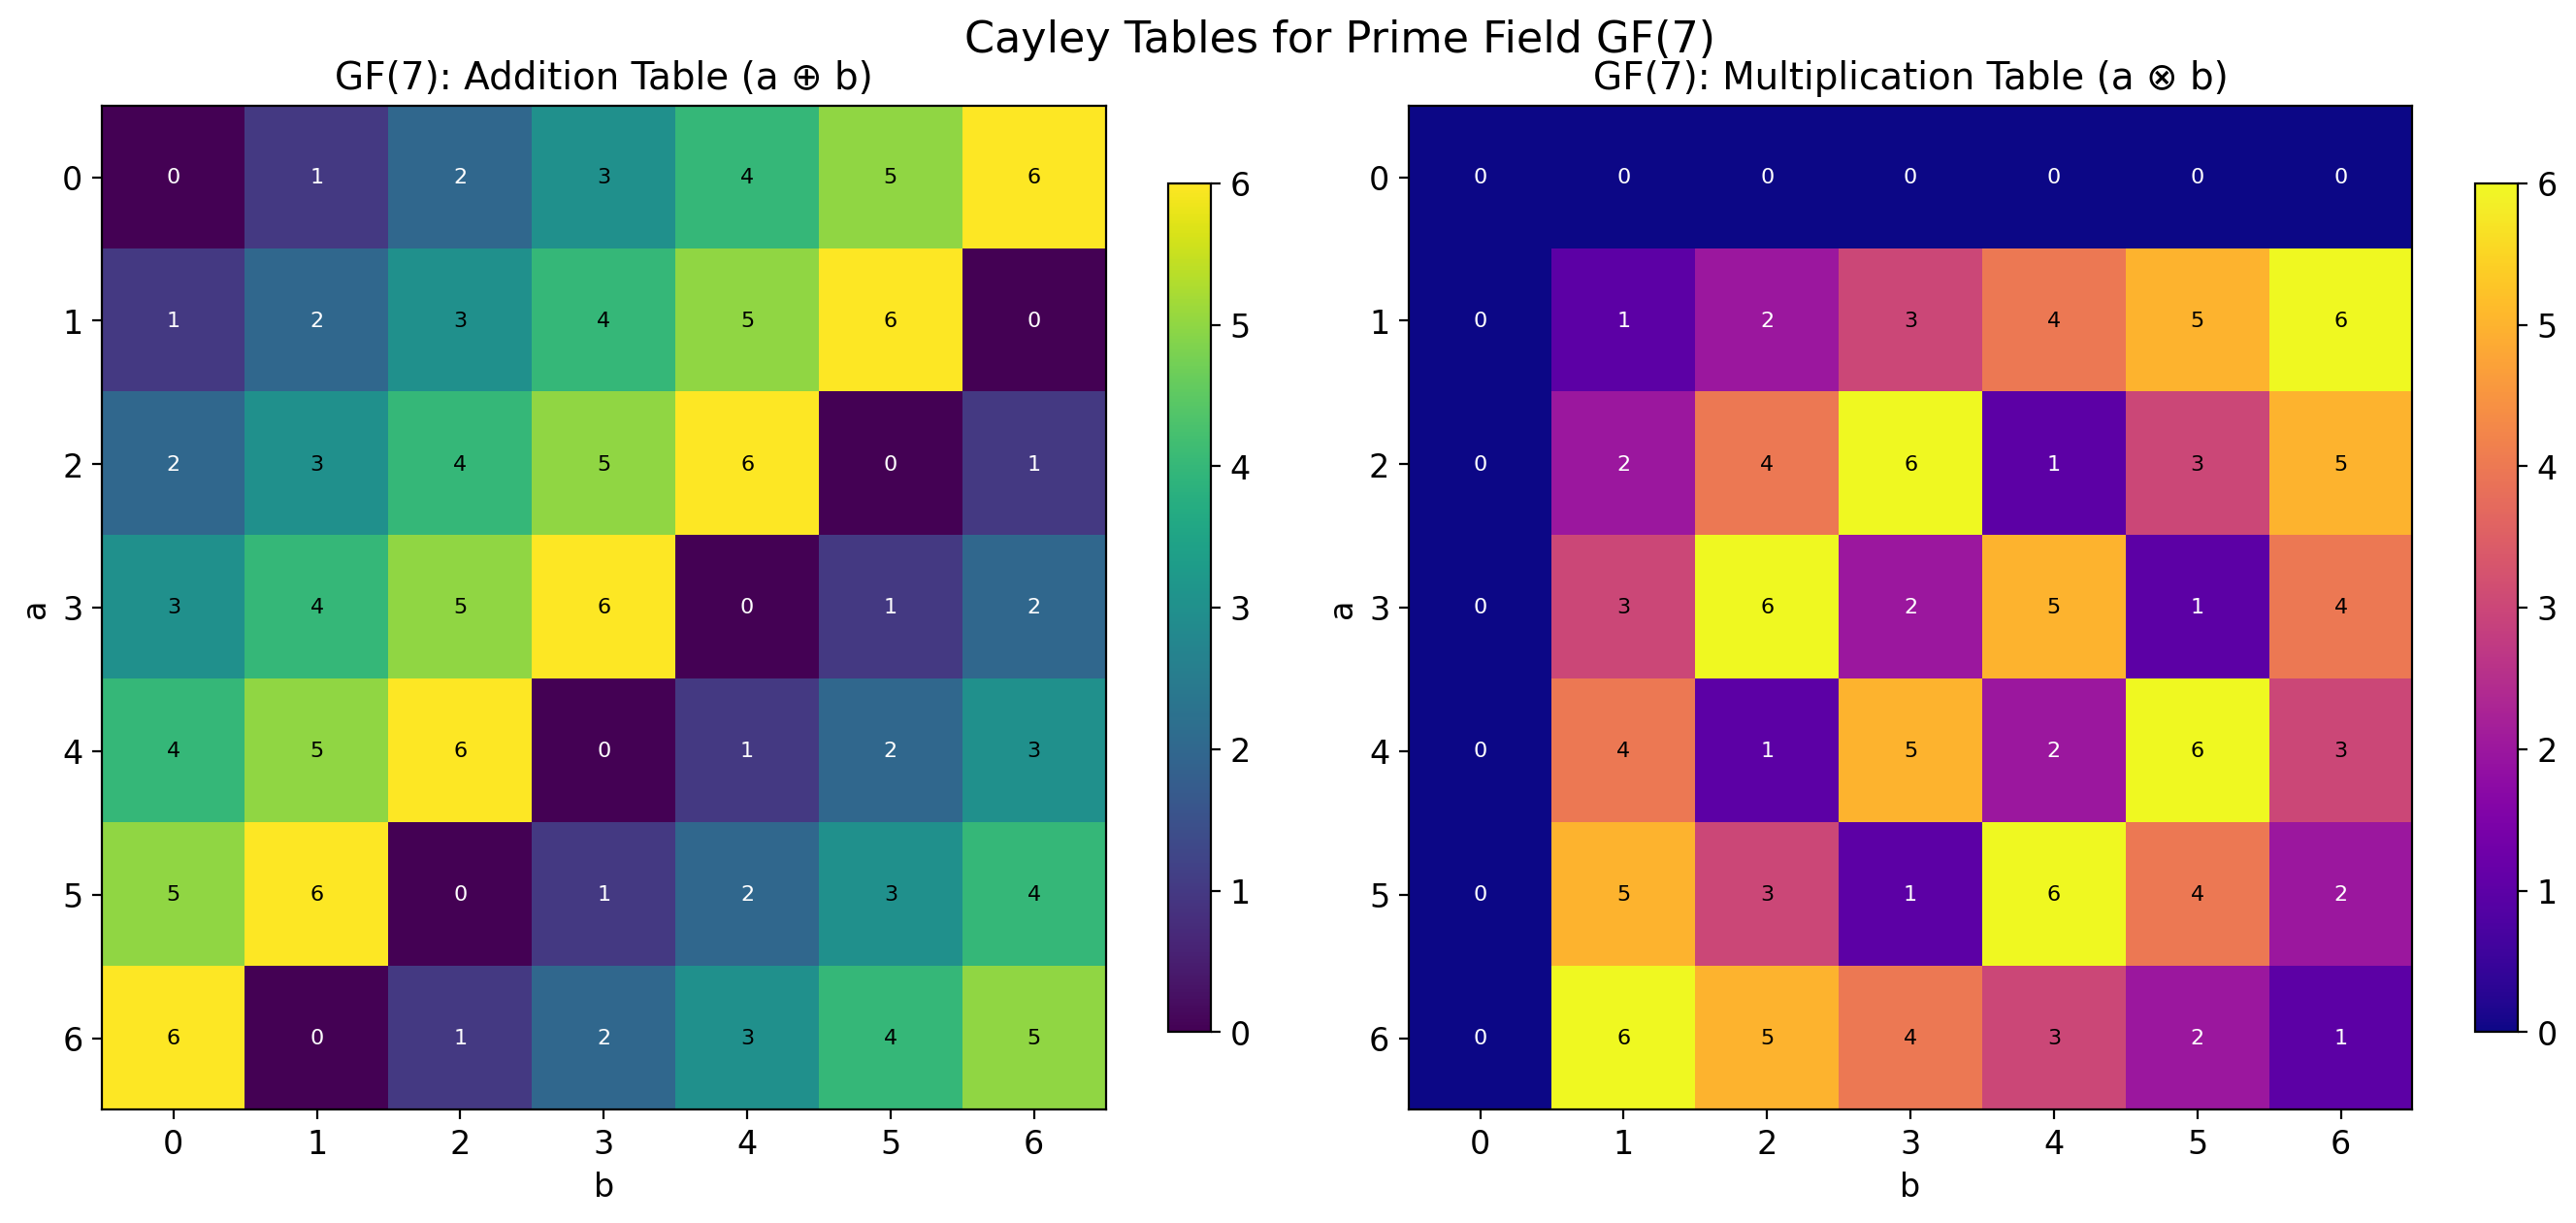

In [9]:
def plot_cayley_tables(field, title_prefix, field_name):
    """
    Plot addition and multiplication Cayley tables for a finite field.
    """
    add_table = field.addition_table()
    mul_table = field.multiplication_table()
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Addition table
    im1 = axes[0].imshow(add_table, cmap='viridis', aspect='equal')
    axes[0].set_title(f'{field_name}: Addition Table (a ⊕ b)', fontsize=14)
    axes[0].set_xlabel('b', fontsize=12)
    axes[0].set_ylabel('a', fontsize=12)
    
    # Set ticks
    n = len(field.elements)
    axes[0].set_xticks(range(n))
    axes[0].set_yticks(range(n))
    axes[0].set_xticklabels(field.elements)
    axes[0].set_yticklabels(field.elements)
    
    # Add text annotations for small fields
    if n <= 16:
        for i in range(n):
            for j in range(n):
                text = axes[0].text(j, i, add_table[i, j],
                                   ha='center', va='center', fontsize=8,
                                   color='white' if add_table[i, j] < n//2 else 'black')
    
    plt.colorbar(im1, ax=axes[0], shrink=0.8)
    
    # Multiplication table
    im2 = axes[1].imshow(mul_table, cmap='plasma', aspect='equal')
    axes[1].set_title(f'{field_name}: Multiplication Table (a ⊗ b)', fontsize=14)
    axes[1].set_xlabel('b', fontsize=12)
    axes[1].set_ylabel('a', fontsize=12)
    
    axes[1].set_xticks(range(n))
    axes[1].set_yticks(range(n))
    axes[1].set_xticklabels(field.elements)
    axes[1].set_yticklabels(field.elements)
    
    if n <= 16:
        for i in range(n):
            for j in range(n):
                text = axes[1].text(j, i, mul_table[i, j],
                                   ha='center', va='center', fontsize=8,
                                   color='white' if mul_table[i, j] < n//2 else 'black')
    
    plt.colorbar(im2, ax=axes[1], shrink=0.8)
    
    plt.tight_layout()
    return fig, axes

# Plot GF(7) Cayley tables
fig1, _ = plot_cayley_tables(gf7, 'GF(7)', 'GF(7)')
plt.suptitle('Cayley Tables for Prime Field GF(7)', fontsize=16, y=1.02)
plt.show()

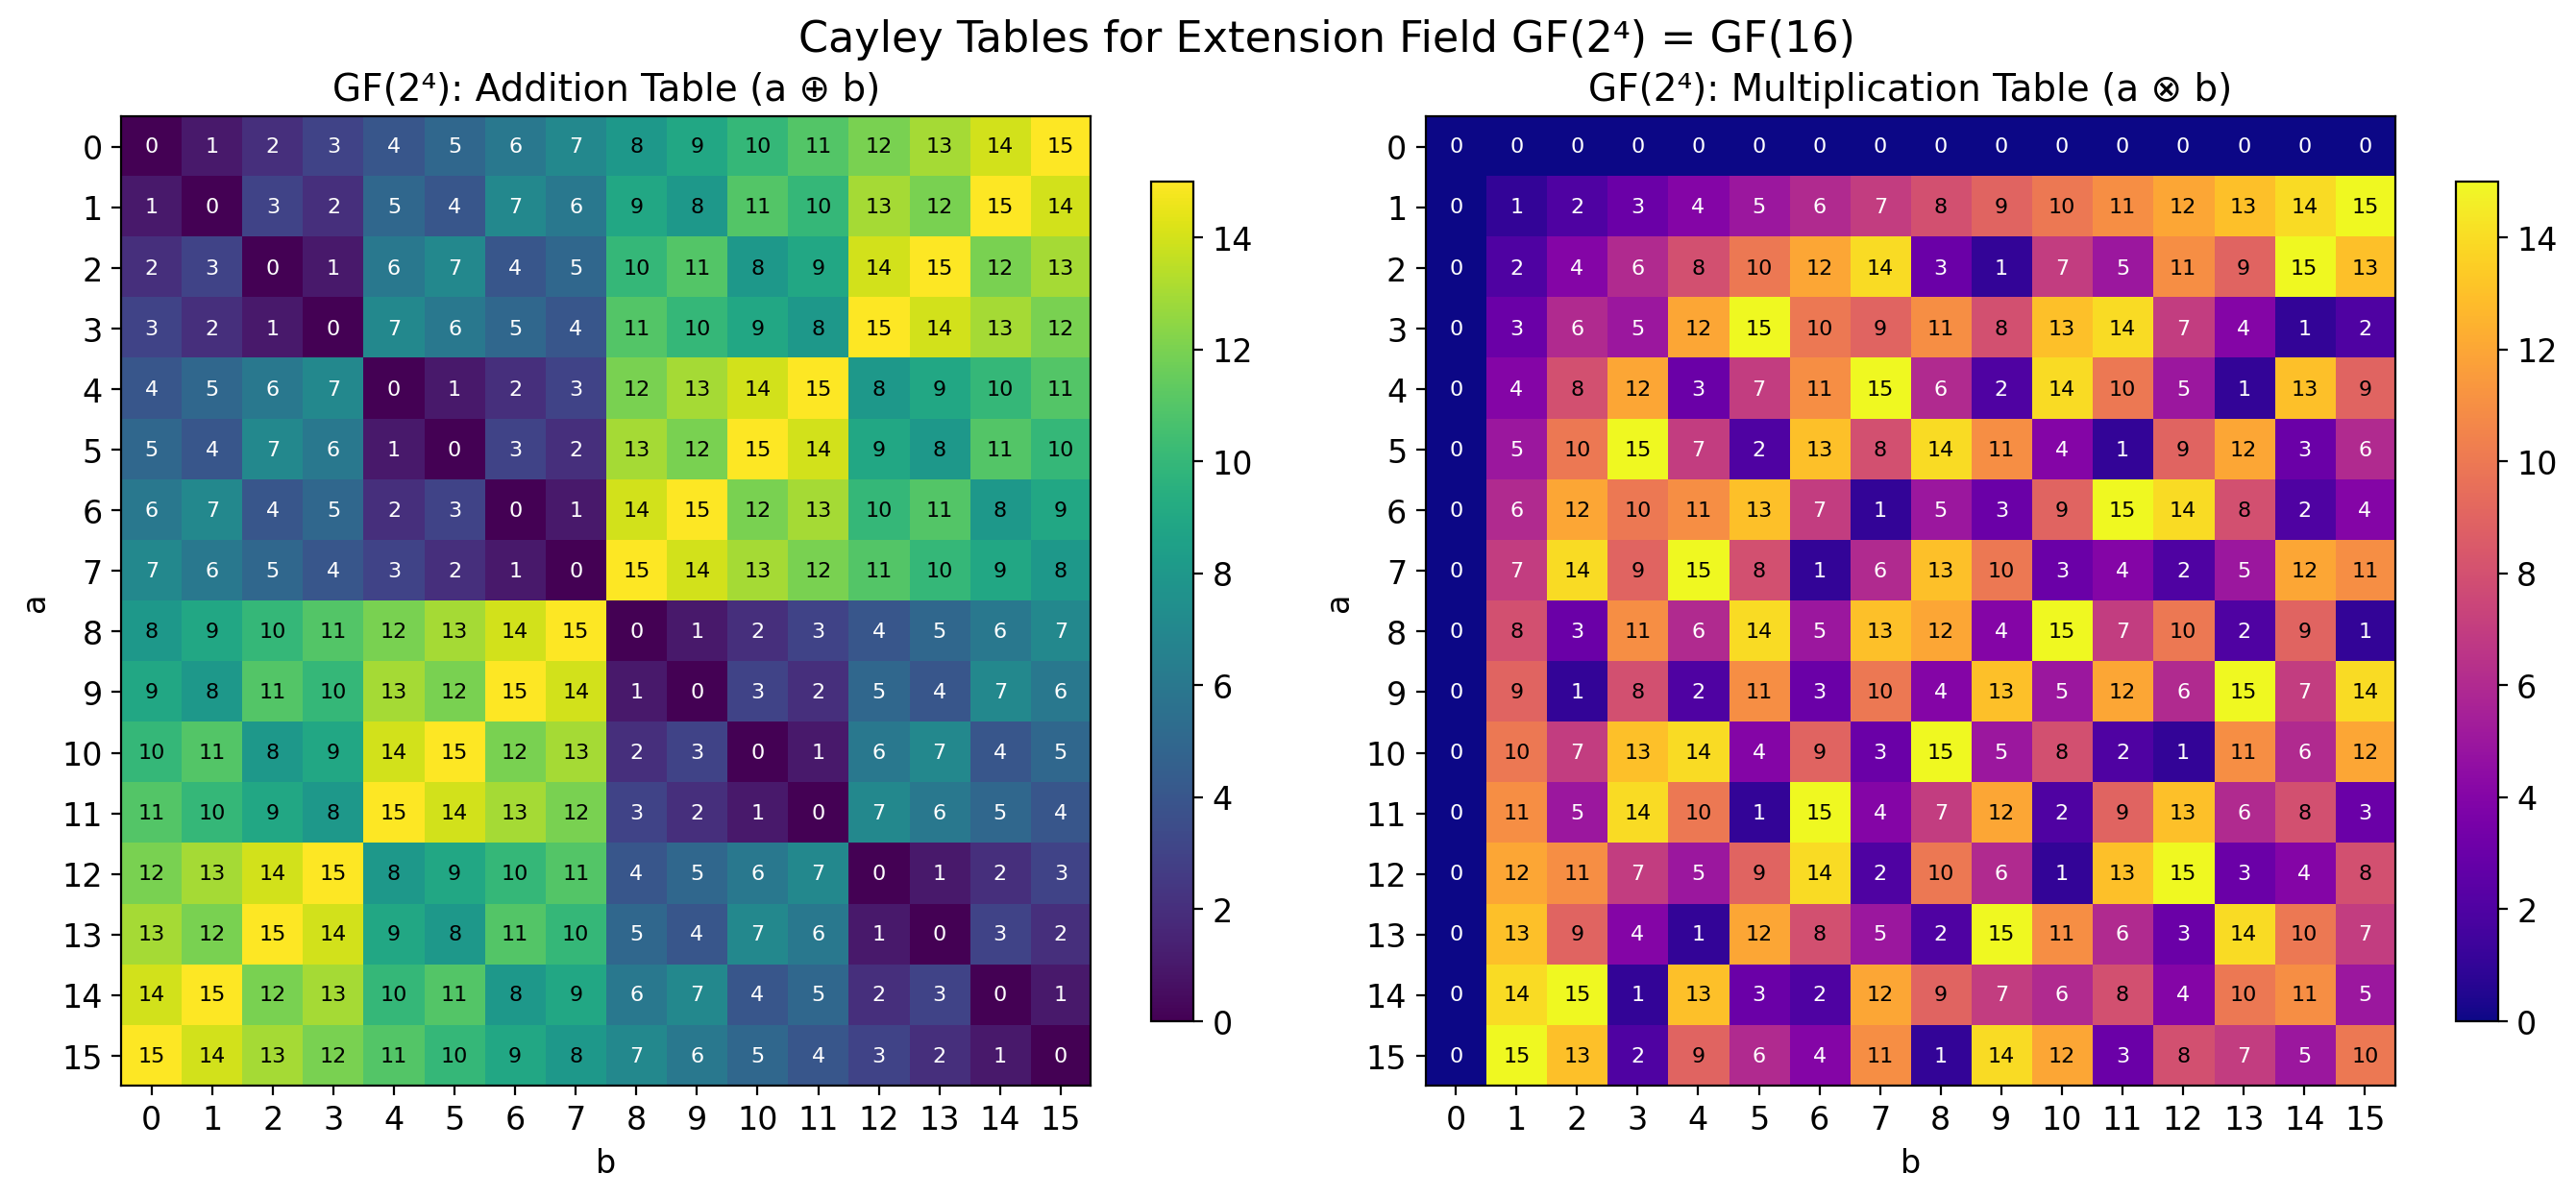

In [10]:
# Plot GF(2^4) = GF(16) Cayley tables
fig2, _ = plot_cayley_tables(gf16, 'GF(16)', 'GF(2⁴)')
plt.suptitle('Cayley Tables for Extension Field GF(2⁴) = GF(16)', fontsize=16, y=1.02)
plt.show()

## Comprehensive Visualization

Let's create a comprehensive figure showing the structure of both prime and extension fields.

Figure saved to plot.png


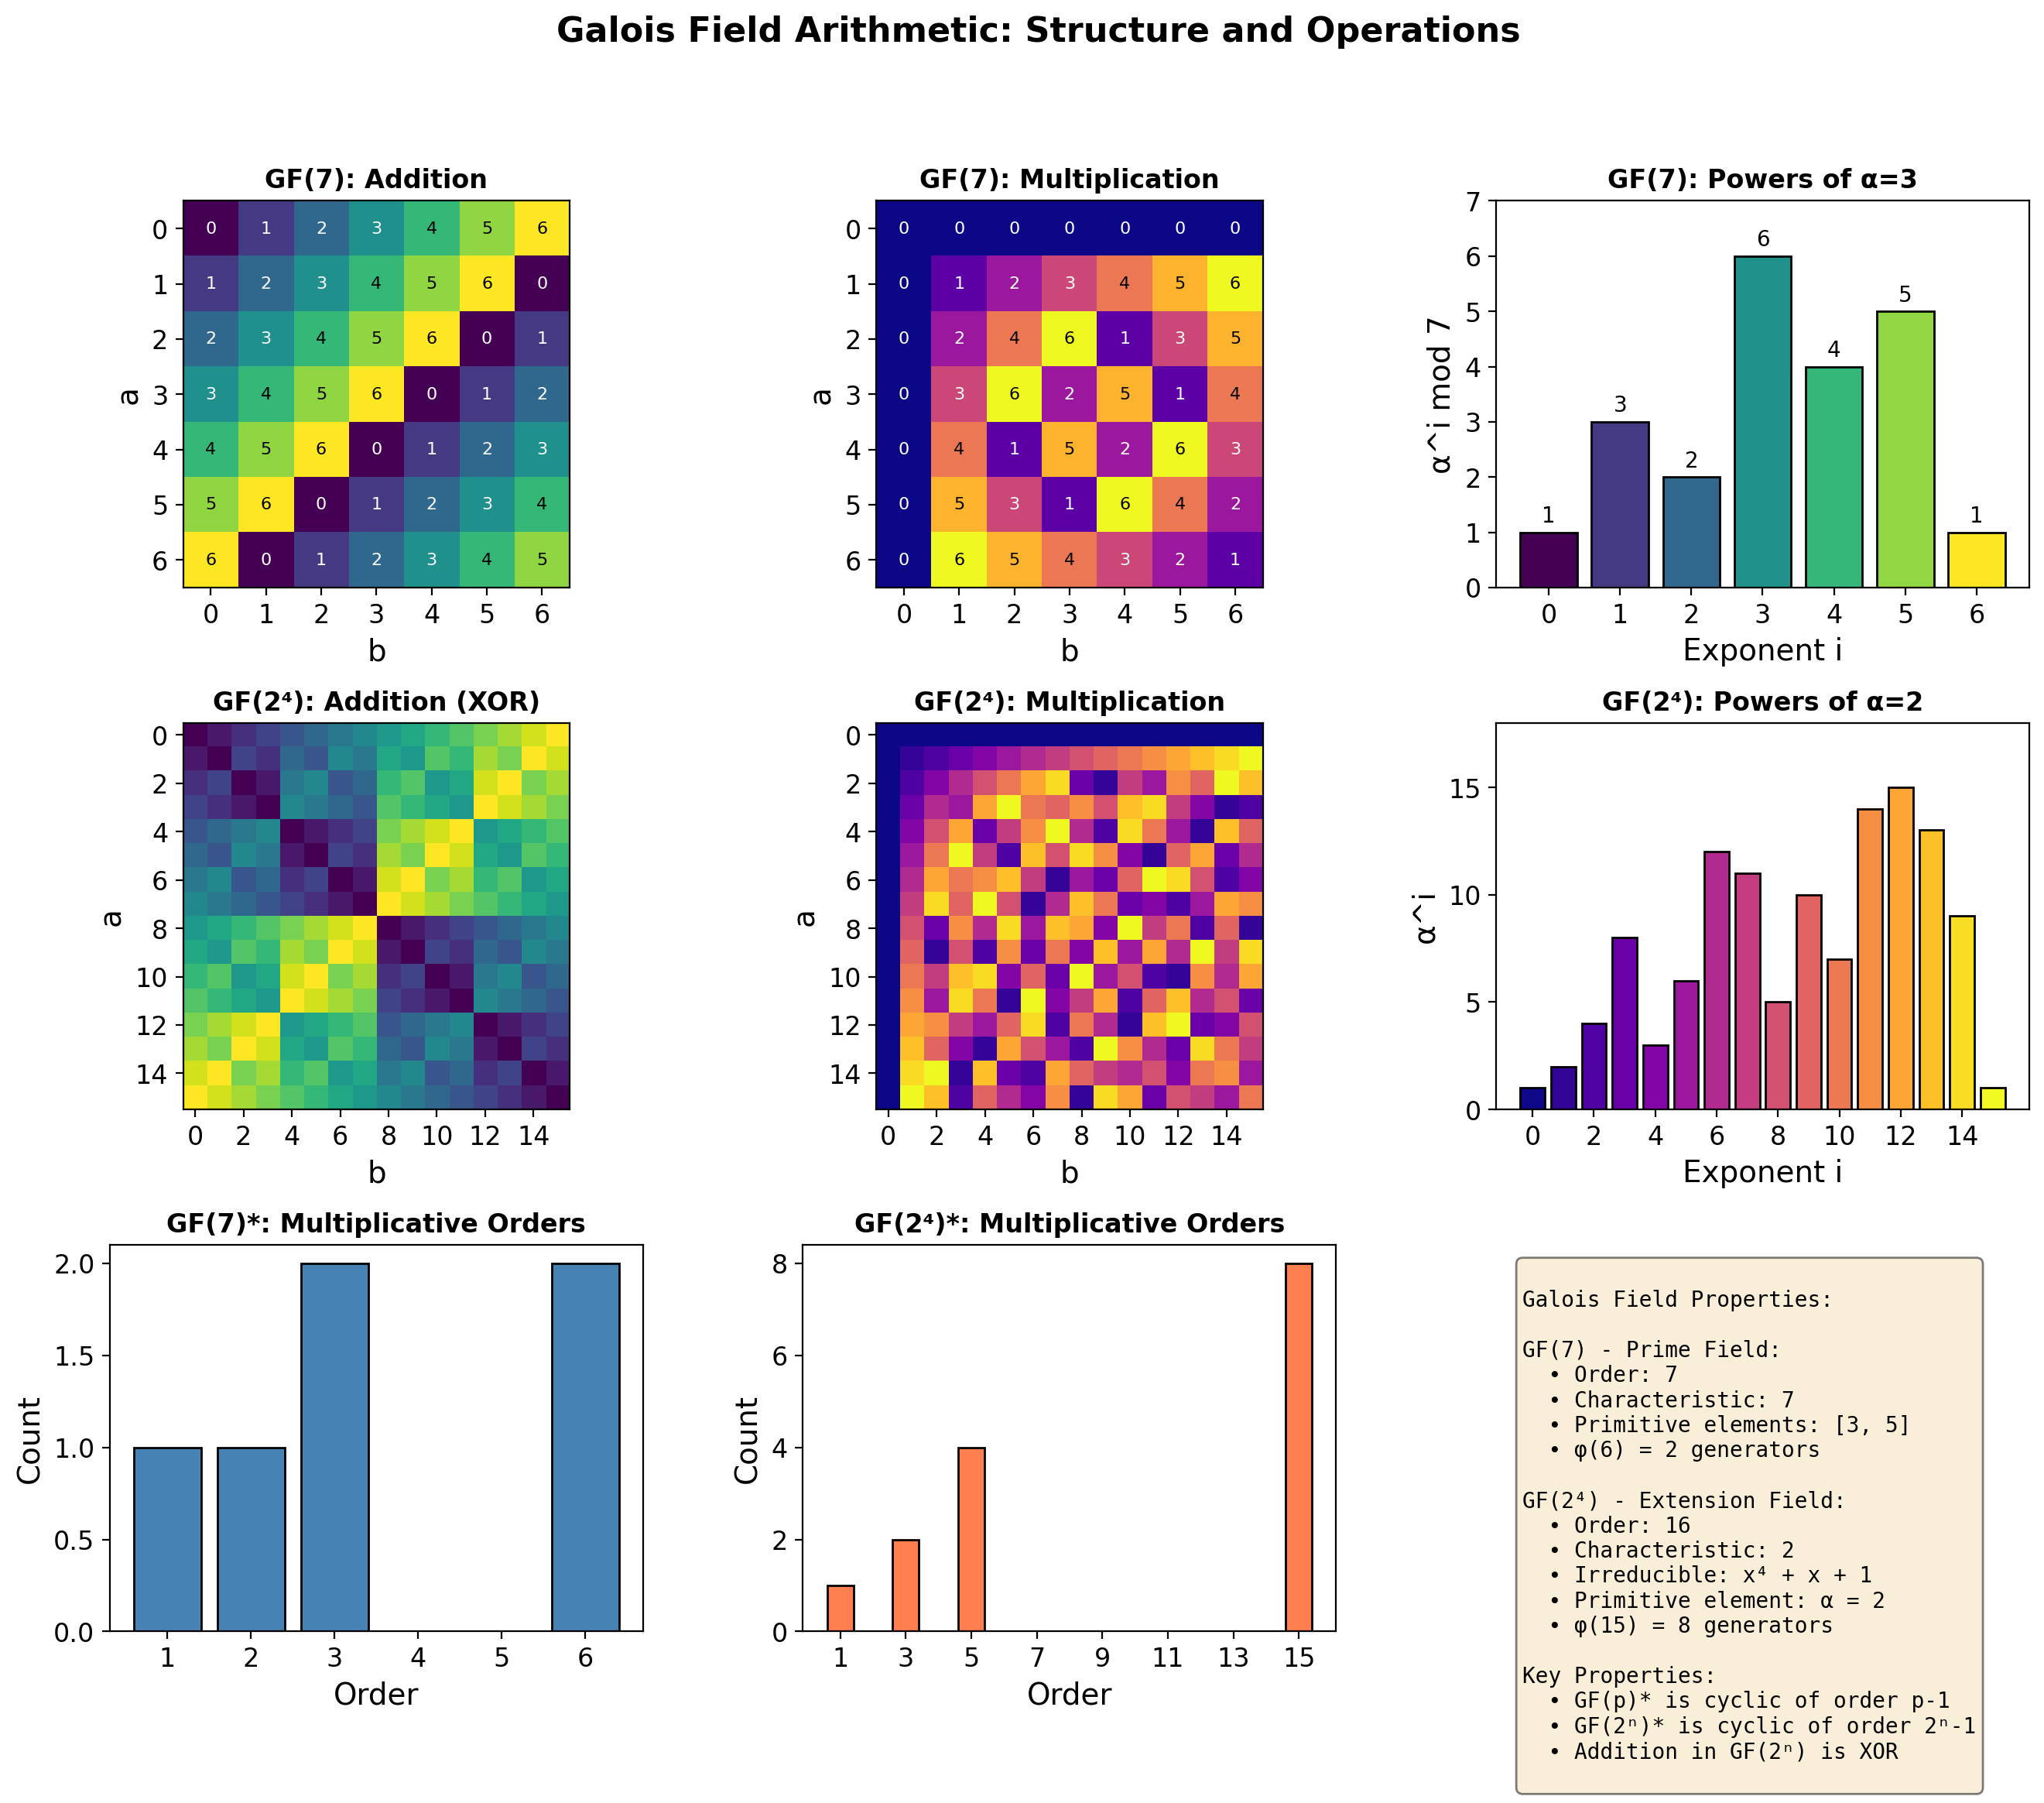

In [11]:
# Create comprehensive visualization
fig = plt.figure(figsize=(16, 12))

# Create subplot grid
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

# GF(7) addition table
ax1 = fig.add_subplot(gs[0, 0])
add_table_7 = gf7.addition_table()
im1 = ax1.imshow(add_table_7, cmap='viridis', aspect='equal')
ax1.set_title('GF(7): Addition', fontsize=12, fontweight='bold')
ax1.set_xlabel('b')
ax1.set_ylabel('a')
ax1.set_xticks(range(7))
ax1.set_yticks(range(7))
for i in range(7):
    for j in range(7):
        ax1.text(j, i, add_table_7[i, j], ha='center', va='center', fontsize=8,
                color='white' if add_table_7[i, j] < 3.5 else 'black')

# GF(7) multiplication table
ax2 = fig.add_subplot(gs[0, 1])
mul_table_7 = gf7.multiplication_table()
im2 = ax2.imshow(mul_table_7, cmap='plasma', aspect='equal')
ax2.set_title('GF(7): Multiplication', fontsize=12, fontweight='bold')
ax2.set_xlabel('b')
ax2.set_ylabel('a')
ax2.set_xticks(range(7))
ax2.set_yticks(range(7))
for i in range(7):
    for j in range(7):
        ax2.text(j, i, mul_table_7[i, j], ha='center', va='center', fontsize=8,
                color='white' if mul_table_7[i, j] < 3.5 else 'black')

# Powers of primitive element in GF(7)
ax3 = fig.add_subplot(gs[0, 2])
primitives_7 = gf7.find_primitive_elements()
g = primitives_7[0]
powers_7 = [gf7.power(g, i) for i in range(7)]
ax3.bar(range(7), powers_7, color=plt.cm.viridis(np.linspace(0, 1, 7)), edgecolor='black')
ax3.set_title(f'GF(7): Powers of α={g}', fontsize=12, fontweight='bold')
ax3.set_xlabel('Exponent i')
ax3.set_ylabel('α^i mod 7')
ax3.set_xticks(range(7))
ax3.set_ylim(0, 7)
for i, v in enumerate(powers_7):
    ax3.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

# GF(2^4) addition table
ax4 = fig.add_subplot(gs[1, 0])
add_table_16 = gf16.addition_table()
im4 = ax4.imshow(add_table_16, cmap='viridis', aspect='equal')
ax4.set_title('GF(2⁴): Addition (XOR)', fontsize=12, fontweight='bold')
ax4.set_xlabel('b')
ax4.set_ylabel('a')
ax4.set_xticks(range(0, 16, 2))
ax4.set_yticks(range(0, 16, 2))

# GF(2^4) multiplication table
ax5 = fig.add_subplot(gs[1, 1])
mul_table_16 = gf16.multiplication_table()
im5 = ax5.imshow(mul_table_16, cmap='plasma', aspect='equal')
ax5.set_title('GF(2⁴): Multiplication', fontsize=12, fontweight='bold')
ax5.set_xlabel('b')
ax5.set_ylabel('a')
ax5.set_xticks(range(0, 16, 2))
ax5.set_yticks(range(0, 16, 2))

# Powers of primitive element in GF(2^4)
ax6 = fig.add_subplot(gs[1, 2])
# Find primitive element
for g in range(2, gf16.order):
    if gf16.is_primitive(g):
        prim_16 = g
        break
powers_16 = [gf16.power(prim_16, i) for i in range(16)]
ax6.bar(range(16), powers_16, color=plt.cm.plasma(np.linspace(0, 1, 16)), edgecolor='black', width=0.8)
ax6.set_title(f'GF(2⁴): Powers of α={prim_16}', fontsize=12, fontweight='bold')
ax6.set_xlabel('Exponent i')
ax6.set_ylabel('α^i')
ax6.set_xticks(range(0, 16, 2))
ax6.set_ylim(0, 18)

# Distribution of multiplicative orders
ax7 = fig.add_subplot(gs[2, 0])
orders_7 = []
for a in range(1, 7):
    for k in range(1, 7):
        if gf7.power(a, k) == 1:
            orders_7.append(k)
            break
ax7.hist(orders_7, bins=range(1, 8), align='left', rwidth=0.8, color='steelblue', edgecolor='black')
ax7.set_title('GF(7)*: Multiplicative Orders', fontsize=12, fontweight='bold')
ax7.set_xlabel('Order')
ax7.set_ylabel('Count')
ax7.set_xticks(range(1, 7))

# Distribution of multiplicative orders in GF(2^4)
ax8 = fig.add_subplot(gs[2, 1])
orders_16 = []
for a in range(1, 16):
    for k in range(1, 16):
        if gf16.power(a, k) == 1:
            orders_16.append(k)
            break
ax8.hist(orders_16, bins=range(1, 17), align='left', rwidth=0.8, color='coral', edgecolor='black')
ax8.set_title('GF(2⁴)*: Multiplicative Orders', fontsize=12, fontweight='bold')
ax8.set_xlabel('Order')
ax8.set_ylabel('Count')
ax8.set_xticks([1, 3, 5, 7, 9, 11, 13, 15])

# Information panel
ax9 = fig.add_subplot(gs[2, 2])
ax9.axis('off')
info_text = """
Galois Field Properties:

GF(7) - Prime Field:
  • Order: 7
  • Characteristic: 7
  • Primitive elements: """ + str(primitives_7) + """
  • φ(6) = 2 generators

GF(2⁴) - Extension Field:
  • Order: 16
  • Characteristic: 2
  • Irreducible: x⁴ + x + 1
  • Primitive element: α = """ + str(prim_16) + """
  • φ(15) = 8 generators

Key Properties:
  • GF(p)* is cyclic of order p-1
  • GF(2ⁿ)* is cyclic of order 2ⁿ-1
  • Addition in GF(2ⁿ) is XOR
"""
ax9.text(0.05, 0.95, info_text, transform=ax9.transAxes, fontsize=10,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Galois Field Arithmetic: Structure and Operations', fontsize=16, fontweight='bold', y=0.98)

# Save the figure
plt.savefig('galois_field_arithmetic_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
print("Figure saved to plot.png")
plt.show()

## Application: Reed-Solomon Error Detection

Galois field arithmetic is essential in error-correcting codes. Let's demonstrate a simple parity check using $\text{GF}(2^4)$.

In [12]:
def simple_checksum(data: List[int], field: GF2n) -> int:
    """
    Compute a simple checksum over GF(2^n).
    
    The checksum is the XOR (addition in GF(2^n)) of all elements.
    """
    checksum = 0
    for d in data:
        checksum = field.add(checksum, d)
    return checksum

def polynomial_evaluation(data: List[int], alpha: int, field: GF2n) -> int:
    """
    Evaluate a polynomial at α using Horner's method.
    
    P(x) = d_0 + d_1*x + d_2*x^2 + ... evaluated at x = α
    """
    result = 0
    for i, coef in enumerate(data):
        result = field.add(result, field.multiply(coef, field.power(alpha, i)))
    return result

# Demonstration
print("=" * 60)
print("APPLICATION: ERROR DETECTION IN GF(2^4)")
print("=" * 60)

# Original data (4 symbols from GF(16))
data = [3, 7, 11, 5]  # Some arbitrary data
print(f"\nOriginal data: {data}")
print(f"As polynomials: {[gf16.to_polynomial_str(d) for d in data]}")

# Compute checksum
checksum = simple_checksum(data, gf16)
print(f"\nChecksum (XOR): {checksum} = {gf16.to_polynomial_str(checksum)}")

# Polynomial evaluation at primitive element
alpha = prim_16
syndrome = polynomial_evaluation(data, alpha, gf16)
print(f"Syndrome P(α) where α={alpha}: {syndrome}")

# Simulate an error
print("\n--- Simulating Error ---")
corrupted_data = data.copy()
corrupted_data[2] ^= 4  # Introduce error by XORing with 4
print(f"Corrupted data: {corrupted_data}")

corrupted_checksum = simple_checksum(corrupted_data, gf16)
print(f"Corrupted checksum: {corrupted_checksum} (differs from {checksum})")
print(f"Error detected: {corrupted_checksum != checksum}")

APPLICATION: ERROR DETECTION IN GF(2^4)

Original data: [3, 7, 11, 5]
As polynomials: ['x + 1', 'x^2 + x + 1', 'x^3 + x + 1', 'x^2 + 1']

Checksum (XOR): 10 = x^3 + x
Syndrome P(α) where α=2: 9

--- Simulating Error ---
Corrupted data: [3, 7, 15, 5]
Corrupted checksum: 14 (differs from 10)
Error detected: True


## Summary

In this notebook, we explored Galois field arithmetic:

### Key Concepts

1. **Prime Fields $\text{GF}(p)$**: Integers modulo a prime $p$ with standard modular arithmetic

2. **Extension Fields $\text{GF}(p^n)$**: Polynomials over $\text{GF}(p)$ modulo an irreducible polynomial

3. **Binary Extension Fields $\text{GF}(2^n)$**: Particularly important in applications where:
   - Addition is XOR (efficient in hardware)
   - Elements map naturally to bit strings

4. **Primitive Elements**: Generators of the cyclic multiplicative group

### Applications

- **AES Encryption**: Uses $\text{GF}(2^8)$ with irreducible polynomial $x^8 + x^4 + x^3 + x + 1$
- **Reed-Solomon Codes**: Error correction using polynomial evaluation over $\text{GF}(2^m)$
- **Elliptic Curve Cryptography**: Curves over $\text{GF}(p)$ or $\text{GF}(2^n)$
- **QR Codes**: Use Reed-Solomon codes over $\text{GF}(2^8)$

### Mathematical Beauty

The existence and uniqueness of finite fields is a remarkable result:
- A finite field of order $q$ exists if and only if $q = p^n$ for some prime $p$
- Up to isomorphism, there is exactly one field of each valid order
- The multiplicative group of any finite field is cyclic